In [1]:
import pandas as pd

# Assuming your CSV file is named 'data.csv'
df = pd.read_csv('2015.csv')
#filters based on South Bend, IN
filtered_df = df[(df['msamd'] == 43780) & (df['state_code'] == 18)]
#only selects specific columns
selected_columns = filtered_df[['as_of_year', 'agency_name', 'agency_abbr', 'loan_type_name', 'loan_type', 'property_type_name', 'property_type', 'loan_purpose_name', 'loan_purpose', 'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s', 'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken', 'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code', 'county_name', 'county_code', 'census_tract_number', 'applicant_ethnicity_name', 'applicant_ethnicity', 'co_applicant_ethnicity_name', 'co_applicant_ethnicity', 'applicant_race_name_1', 'applicant_race_1', 'co_applicant_race_name_1', 'co_applicant_race_1', 'applicant_sex_name', 'applicant_sex', 'co_applicant_sex_name', 'co_applicant_sex', 'applicant_income_000s', 'purchaser_type_name', 'purchaser_type', 'denial_reason_name_1', 'denial_reason_1', 'denial_reason_name_2', 'denial_reason_2', 'denial_reason_name_3', 'denial_reason_name_3', 'hoepa_status_name', 'hoepa_status', 'lien_status_name', 'lien_status', 'population', 'minority_population', 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units']]


print(selected_columns.head())

<ipython-input-1-861f1525f03a>:4: DtypeWarning: Columns (34,36,38,42,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2015.csv')


     as_of_year                                  agency_name agency_abbr  \
13         2015  Department of Housing and Urban Development         HUD   
140        2015  Department of Housing and Urban Development         HUD   
153        2015  Department of Housing and Urban Development         HUD   
159        2015  Department of Housing and Urban Development         HUD   
191        2015         Consumer Financial Protection Bureau        CFPB   

    loan_type_name  loan_type  \
13    Conventional          1   
140    FHA-insured          2   
153    FHA-insured          2   
159  VA-guaranteed          3   
191   Conventional          1   

                                    property_type_name  property_type  \
13   One-to-four family dwelling (other than manufa...              1   
140  One-to-four family dwelling (other than manufa...              1   
153  One-to-four family dwelling (other than manufa...              1   
159  One-to-four family dwelling (other than manufa.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
#action_taken_name vs applicant_race_name_1
#14
actions = ['Loan originated', 'Application denied by financial institution', 'Loan purchased by the institution', 'Application withdrawn by applicant', 'File closed for incompleteness', 'Application approved but not accepted']

all_races = selected_columns['applicant_race_name_1'].unique() #28
#print(all_races)
''''White' 'Asian' 'Not applicable'
 'Information not provided by applicant in mail, Internet, or telephone application'
 'Black or African American' 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander'''

race_dict = {}
count = 0

race = list(selected_columns['applicant_race_name_1'])
actions = list(selected_columns['action_taken_name'])

for i in range(0, len(race)):
   #print(type(race[i]))
   if race[i] in race_dict:
    if actions[i] in race_dict[race[i]]:
      #print(actions[i])
      race_dict[race[i]][actions[i]] += 1
    else:
      race_dict[race[i]][actions[i]] = 0
   else:
    race_dict[race[i]] = {}
    if actions[i] in race_dict[race[i]]:
      #print(actions[i])
      race_dict[race[i]][actions[i]] += 1
    else:
      race_dict[race[i]][actions[i]] = 0

#
print(race_dict)

#  count += 1


{'White': {'Application denied by financial institution': 1228, 'Loan originated': 4583, 'Application withdrawn by applicant': 605, 'Loan purchased by the institution': 436, 'File closed for incompleteness': 270, 'Application approved but not accepted': 222}, 'Asian': {'Loan originated': 87, 'Application denied by financial institution': 32, 'Application approved but not accepted': 3, 'Loan purchased by the institution': 8, 'File closed for incompleteness': 4, 'Application withdrawn by applicant': 8}, 'Not applicable': {'Loan purchased by the institution': 874, 'Loan originated': 32, 'Application denied by financial institution': 24, 'Application withdrawn by applicant': 2, 'Application approved but not accepted': 0}, 'Information not provided by applicant in mail, Internet, or telephone application': {'Loan originated': 311, 'Application denied by financial institution': 181, 'File closed for incompleteness': 38, 'Loan purchased by the institution': 11, 'Application approved but not a

In [4]:
import matplotlib.pyplot as plt
race_count = {}


for key in race_dict:
  count = 0
  for state in race_dict[key]:
    count += race_dict[key][state]

  race_count[key] = count

print(race_count)


for key in race_count:
  race_count[key] = race_dict[key]["Loan originated"] / race_count[key]

print(race_count)

{'White': 7344, 'Asian': 142, 'Not applicable': 932, 'Information not provided by applicant in mail, Internet, or telephone application': 655, 'Black or African American': 481, 'American Indian or Alaska Native': 37, 'Native Hawaiian or Other Pacific Islander': 10}
{'White': 0.6240468409586056, 'Asian': 0.6126760563380281, 'Not applicable': 0.034334763948497854, 'Information not provided by applicant in mail, Internet, or telephone application': 0.47480916030534354, 'Black or African American': 0.4781704781704782, 'American Indian or Alaska Native': 0.43243243243243246, 'Native Hawaiian or Other Pacific Islander': 0.8}


<ipython-input-5-d3b8a67f83bf>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


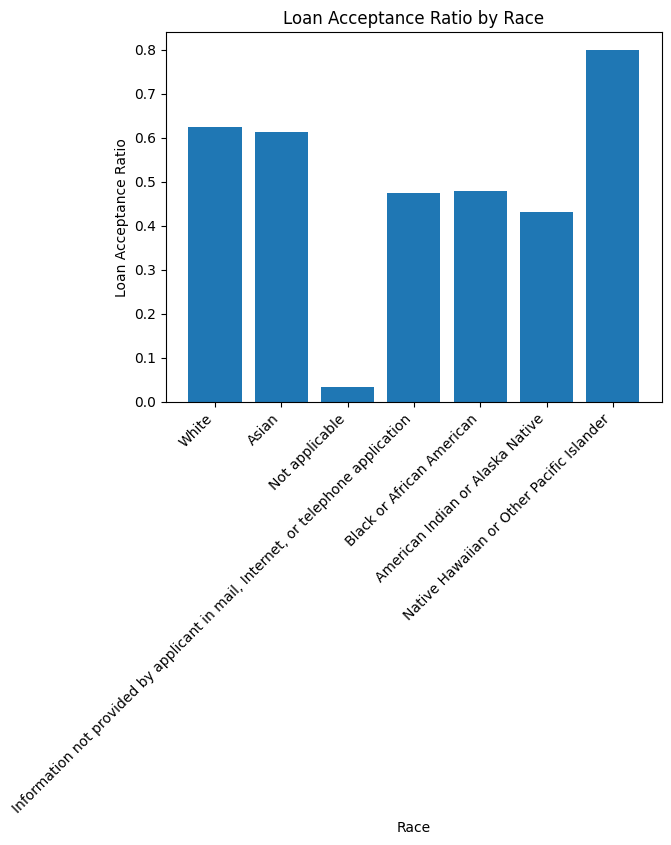

In [5]:
import matplotlib.pyplot as plt

# Create a list of races and their corresponding loan acceptance ratios
races = list(race_count.keys())
acceptance_ratios = list(race_count.values())

# Create a bar plot
plt.bar(races, acceptance_ratios)

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Loan Acceptance Ratio')
plt.title('Loan Acceptance Ratio by Race')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00


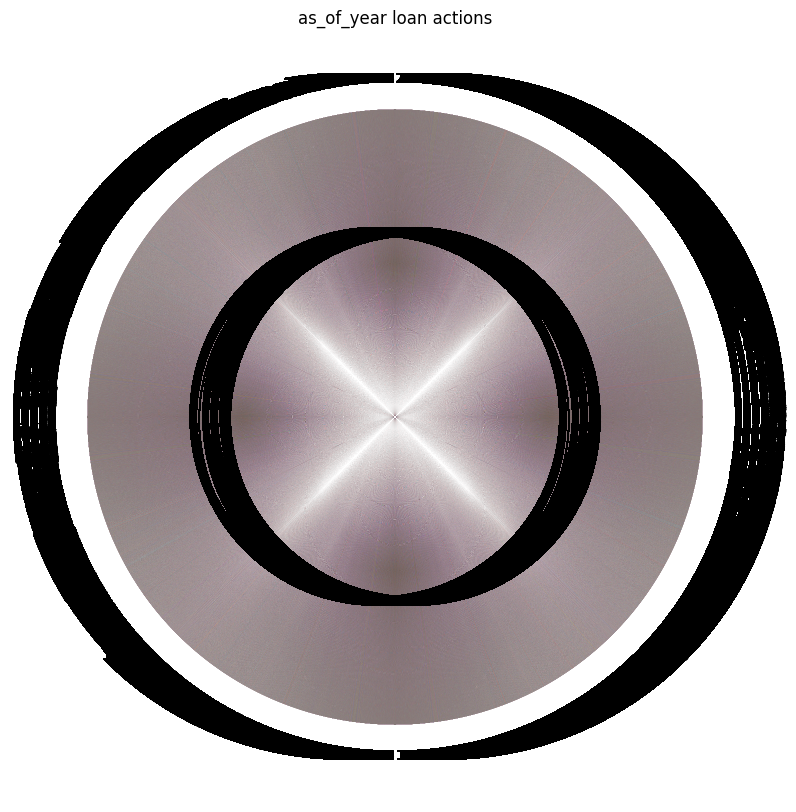

<function __main__.plot_pie_chart(race)>

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
from ipywidgets import interact
import pandas as pd

# Function to plot pie chart for a selected race
def plot_pie_chart(race):
    actions = df[race]
    total = actions.sum()
    percentages = (actions / total) * 100  # Calculate percentages for each action

    plt.figure(figsize=(20, 10))
    plt.pie(percentages, labels=actions.index, autopct='%1.2f%%', startangle=100)
    plt.title(f"{race} loan actions")
    plt.show()

# Interactive widget to select race
interact(plot_pie_chart, race=list(df.columns))

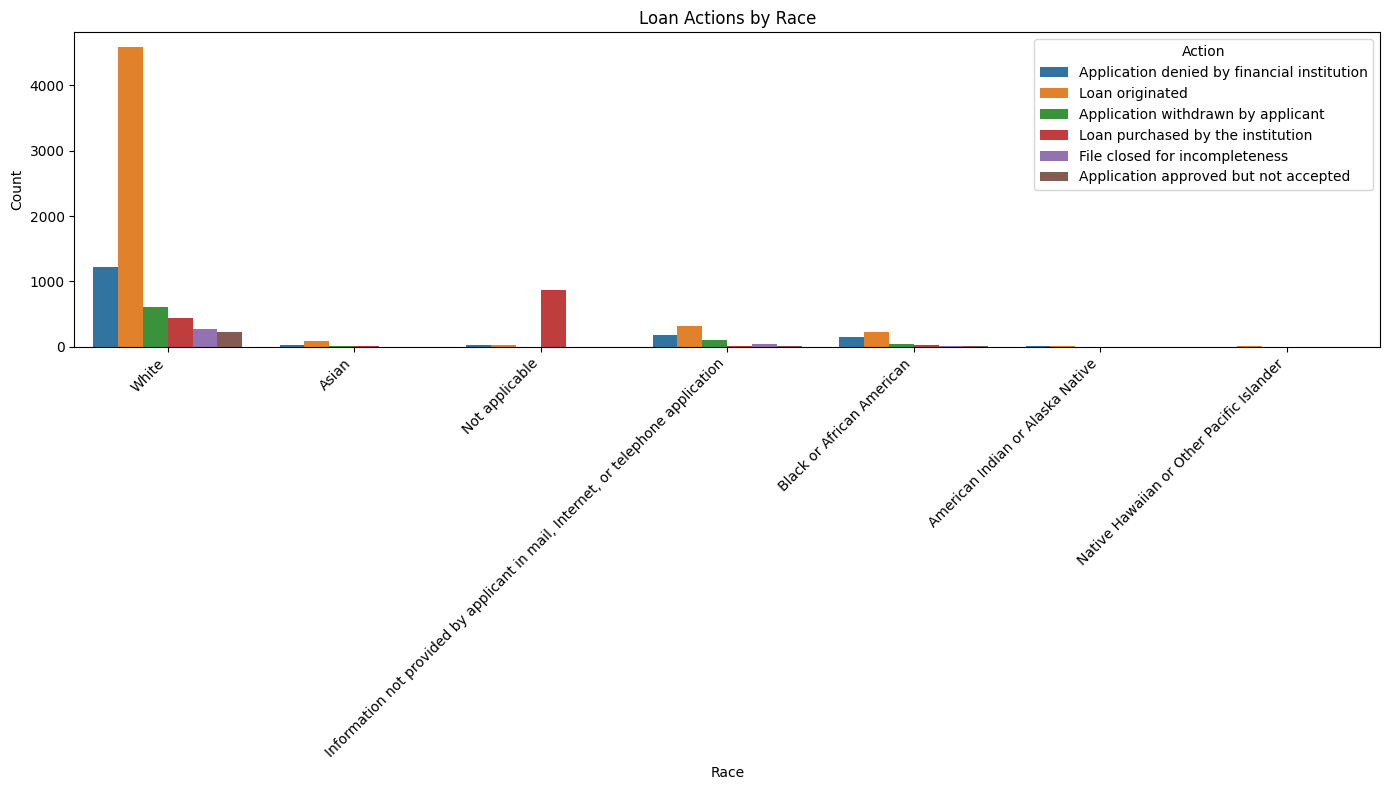

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(race_dict).T.reset_index().melt(id_vars='index', var_name='Action', value_name='Count')
df.rename(columns={'index': 'Race'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Race', y='Count', hue='Action', data=df)

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha="right")

# Set titles and labels
plt.title('Loan Actions by Race')
plt.xlabel('Race')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


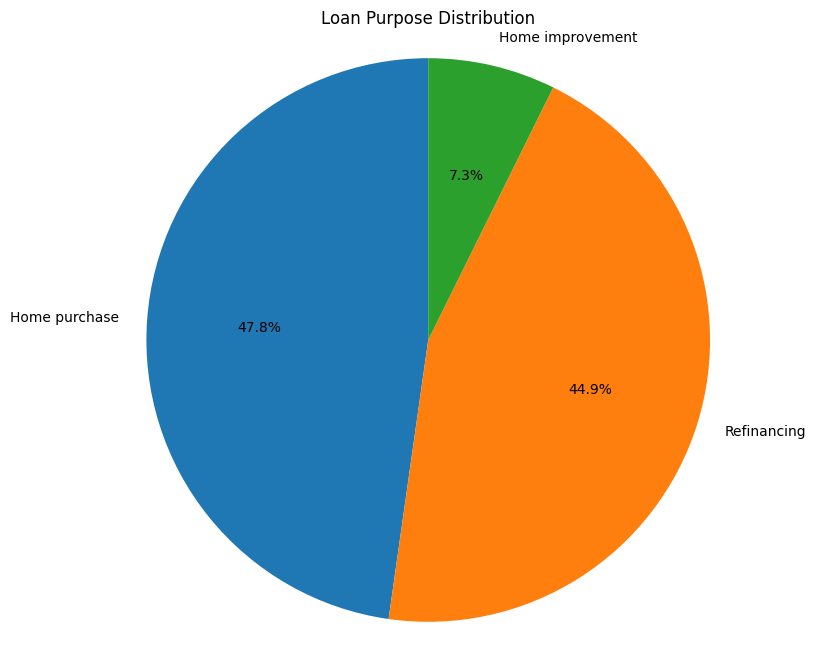

In [ ]:
import matplotlib.pyplot as plt

loan_purpose_counts = selected_columns['loan_purpose_name'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Purpose Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

In [ ]:
# Assuming your CSV file is named 'data.csv'
df2 = pd.read_csv('2016.csv')
#filters based on South Bend, IN
filtered_df2 = df[(df['msamd'] == 43780) & (df['state_code'] == 18)]
#only selects specific columns
selected_columns2 = filtered_df[['as_of_year', 'agency_name', 'agency_abbr', 'loan_type_name', 'loan_type', 'property_type_name', 'property_type', 'loan_purpose_name', 'loan_purpose', 'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s', 'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken', 'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code', 'county_name', 'county_code', 'census_tract_number', 'applicant_ethnicity_name', 'applicant_ethnicity', 'co_applicant_ethnicity_name', 'co_applicant_ethnicity', 'applicant_race_name_1', 'applicant_race_1', 'co_applicant_race_name_1', 'co_applicant_race_1', 'applicant_sex_name', 'applicant_sex', 'co_applicant_sex_name', 'co_applicant_sex', 'applicant_income_000s', 'purchaser_type_name', 'purchaser_type', 'denial_reason_name_1', 'denial_reason_1', 'denial_reason_name_2', 'denial_reason_2', 'denial_reason_name_3', 'denial_reason_name_3', 'hoepa_status_name', 'hoepa_status', 'lien_status_name', 'lien_status', 'population', 'minority_population', 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units']]


print(selected_columns2.head())

FileNotFoundError: [Errno 2] No such file or directory: '2016.csv'